In [4]:
#import necessary codes and required text file
import numpy as np
import pylab as pl
dow = np.loadtxt("dow.txt", float)

# Question 1

# Question 2

### Comments:
- 23/30
- Good program. No discussion of why the smaller peaks disappear with the coefficients removed. Would this happen if you removed the left side of the array instead?

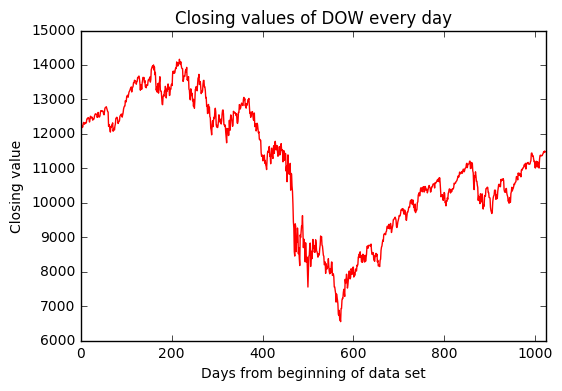

In [6]:
#plot a graph of the values whilst limiting the graphs x axis to the range of values for days.
dowl = np.arange(len(dow))
pl.plot(dowl, dow, color = 'red')
pl.title('Closing values of DOW every day')
pl.xlabel('Days from beginning of data set')
pl.ylabel('Closing value')
pl.xlim(0,(len(dow)))
pl.show()

In [7]:
dowf = np.fft.rfft(dow)
print dowf

[  1.12839039e+07 +0.00000000e+00j   6.84127740e+05 -9.55087519e+05j
  -4.19226205e+05 +9.29089562e+04j   7.41901498e+04 -2.73812250e+05j
  -3.51856811e+04 +7.23658613e+04j   1.11482643e+05 -3.14779807e+04j
   2.16752824e+04 -2.45751549e+04j   1.11224416e+04 +2.47975704e+04j
   3.11884665e+04 +2.27868210e+04j   7.38523102e+03 -3.21233427e+04j
  -3.39615972e+04 -1.07833052e+05j  -1.23569569e+04 +2.73171276e+04j
   2.13837315e+04 -9.16684147e+04j  -4.32441725e+04 +9.92294540e+04j
  -3.55753518e+03 -2.54972743e+04j  -3.04367677e+04 -1.72551151e+04j
  -9.31799610e+03 -2.49297658e+04j  -9.35033325e+03 -1.75612302e+04j
   1.17418062e+04 +2.09235370e+04j   4.22549031e+04 -2.38143067e+03j
   1.35294835e+04 -3.06720066e+04j   4.06499470e+03 -2.87140744e+04j
  -1.56146318e+04 +2.24811825e+04j   1.35756353e+04 -1.28123867e+04j
   1.20484888e+04 +3.50866363e+03j  -1.55111478e+04 -1.70617041e+04j
   8.98307189e+03 +4.49546331e+03j   4.42970647e+03 +1.59761534e+03j
  -3.00967682e+04 -3.74705070e+04j

In [8]:
print 'Amount of coefficients in the fourier transform =', len(dowf)
print 'Expected coefficients according to the formula (0.5*N + 1) =', 0.5*len(dow) + 1
print 'Both figures are therefore in agreement and amount of coefficients are as expected.'

Amount of coefficients in the fourier transform = 513
Expected coefficients according to the formula (0.5*N + 1) = 513.0
Both figures are therefore in agreement and amount of coefficients are as expected.


In [12]:
#seperate out the first 10 percent of the function.
#create a new array filled with only this 10 percent.
dowfl = len(dowf)
dowfl10 = (((dowfl)//10))
dowf10_copy = np.copy(dowf)
dowf10_copy[(dowfl10):(dowfl)] = 0.0

In [14]:
#calculate the inverse fourier transform using numpy's inbuilt irfft function.
inv_dowf10 = np.fft.irfft(dowf10_copy)

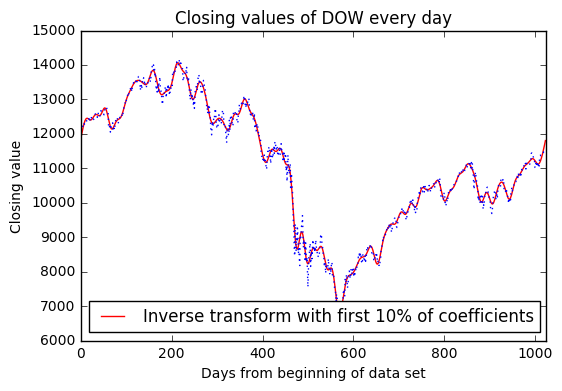

In [15]:
#plot these values on a graph with the original data in different colours and line types.
pl.plot(dowl,inv_dowf10, color = 'red', label='Inverse transform with first 10% of coefficients')
pl.plot(dowl, dow, ':', color = 'blue')
pl.title('Closing values of DOW every day')
pl.xlabel('Days from beginning of data set')
pl.ylabel('Closing value')
pl.xlim(0,(len(dow)))
pl.legend(loc='best')
pl.show()

In [16]:
#repeat same steps as before but for only the first 2% of coefficients.
dowfl2 = (((dowfl)//50))
dowf2_copy = np.copy(dowf)
dowf2_copy[(dowfl2):(dowfl)] = 0.0

In [17]:
inv_dowf2 = np.fft.irfft(dowf2_copy)

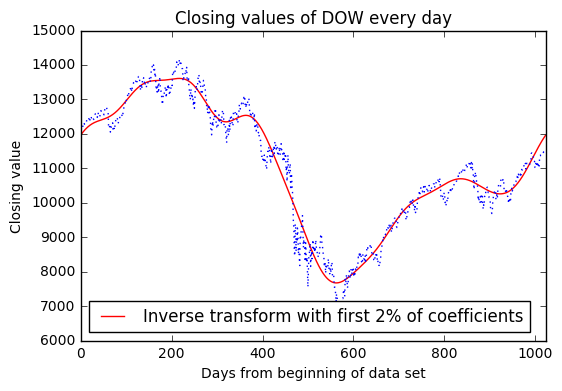

In [19]:
pl.plot(dowl,inv_dowf2, color = 'red', label='Inverse transform with first 2% of coefficients')
pl.plot(dowl, dow, ':', color = 'blue')
pl.title('Closing values of DOW every day')
pl.xlabel('Days from beginning of data set')
pl.ylabel('Closing value')
pl.xlim(0,(len(dow)))
pl.legend(loc='best')
pl.show()

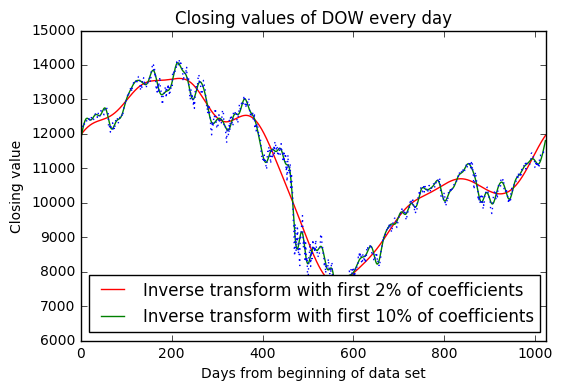

In [21]:
#to compare these two results, we can plot both on the same graph and visually describe their differences.
pl.plot(dowl,inv_dowf2, color = 'red', label='Inverse transform with first 2% of coefficients')
pl.plot(dowl,inv_dowf10, color = 'green', label='Inverse transform with first 10% of coefficients')
pl.plot(dowl, dow, ':', color = 'blue')
pl.title('Closing values of DOW every day')
pl.xlabel('Days from beginning of data set')
pl.ylabel('Closing value')
pl.xlim(0,(len(dow)))
pl.legend(loc='best')
pl.show()

We can see from the graph that the inverse fourier transform of the first 2% 
of coefficients gives a far smoother fit but misses many of the small peaks 
in the closing values of the index. Conversely, the fit of the inverse fourier 
transform of the first 10% of coefficients gives a far more accurate fit 
encompassing most of the smaller peaks in the graph.